<a href="https://colab.research.google.com/github/pedrojosefernandez1/k_brazos_FCPSSL/blob/main/epsilonGreedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio comparativo de algoritmos ε-greedy en un problema de k-armed bandit

*Description:* El experimento compara el rendimiento de algoritmos ε-greedy en un problema de k-armed bandit.
Se generan gráficas de recompensas promedio para cada algoritmo.

    Author: Jaime Pujante Sáez
    Email: jaime.pujantes@um.es

    Author: Ricardo Javier Sendra Lázaro
    Email: ricardojavier.sendral@um.es

    Author: Pedro José Fernandez Campillo
    Email: pedrojose.fernandez1@um.es

This software is licensed under the GNU General Public License v3.0 (GPL-3.0),
with the additional restriction that it may not be used for commercial purposes.

For more details about GPL-3.0: https://www.gnu.org/licenses/gpl-3.0.html



## Preparación del entorno
Para realizar el estudio, recuperamos las variables y funciones del notebook anterior que se utilizarán en todos los estudios, siendo estas número de brazos y bandidos, ejecuciones, pasos y funciones de ejecución del experimento.

Antes de ello, vamos a clonar el repositorio e instalar las dependencias para que pueda ser ejecutado correctamente en Google Colab.

In [ ]:
import os
from urllib.parse import urlparse

GITHUB_REPO_URL = "https://github.com/pedrojosefernandez1/k_brazos_FCPSSL.git"

# Extraer usuario y nombre del repositorio automáticamente
def obtener_usuario_y_repo(url):
    path = urlparse(url).path.strip('/')
    parts = path.split('/')
    if len(parts) >= 2:
        return parts[0], parts[1]
    return None, None

GITHUB_USERNAME, GITHUB_REPO_NAME = obtener_usuario_y_repo(GITHUB_REPO_URL)
GITHUB_REPO_NAME = GITHUB_REPO_NAME.replace('.git', '')
if not GITHUB_USERNAME or not GITHUB_REPO_NAME:
    raise ValueError("URL del repositorio inválida. Asegúrate de que sea de GitHub y tenga el formato correcto.")

REPO_NAME = GITHUB_REPO_NAME  # Nombre de la carpeta después de clonar

# Clonar el repositorio si no existe
os.makedirs(REPO_NAME, exist_ok=True)
if not os.path.exists(os.path.join(REPO_NAME, ".git")):
    ! git clone {GITHUB_REPO_URL} {REPO_NAME}

  
# Verificar si existe un archivo requirements.txt para instalar dependencias
req_file = os.path.join(REPO_NAME, "requirements.txt")
if os.path.exists(req_file):
    ! pip install -r {req_file}

In [ ]:
import sys
sys.path.append(f'{REPO_NAME}/src')
from arms import ArmNormal, Bandit, ArmBernoulli, ArmBinomial
from plotting import plot_average_rewards, plot_optimal_selections, plot_arm_statistics, plot_regret
from algorithms import EpsilonGreedy
from experiments import run_experiment

k = 10  # Número de brazos
steps = 1000  # Número de pasos que se ejecutarán cada algoritmo
runs = 500  # Número de ejecuciones

# Creación de los bandit, cada uno con una distribución de Arm distinta
# Bandit Normal
banditNormal = Bandit(arms=ArmNormal.generate_arms(k)) # Generar un bandido con k brazos de distribución normal
optimal_arm_normal = banditNormal.optimal_arm
print(f"Optimal normal arm: {optimal_arm_normal + 1} with expected reward={banditNormal.get_expected_value(optimal_arm_normal)}")
# Bandit Binomial
banditBinomial = Bandit(arms=ArmBinomial.generate_arms(k)) # Generar un bandido con k brazos de distribución binomial
optimal_arm_binomial = banditBinomial.optimal_arm
print(f"Optimal binumial arm: {optimal_arm_binomial + 1} with expected reward={banditBinomial.get_expected_value(optimal_arm_binomial)}")
# Bandit Bernoulli
banditBernoulli = Bandit(arms=ArmBernoulli.generate_arms(k)) # Generar un bandido con k brazos de distribución bernoulli
optimal_arm_bernoulli = banditBernoulli.optimal_arm
print(f"Optimal bernoulli arm: {optimal_arm_bernoulli + 1} with expected reward={banditBernoulli.get_expected_value(optimal_arm_bernoulli)}")

Optimal normal arm: 9 with expected reward=9.84
Optimal binumial arm: 4 with expected reward=4.514609035191693
Optimal bernoulli arm: 7 with expected reward=0.96


## Ejecución del experimento

Se realiza el experimento usando 3 bandidos de 10 brazos:
- Uno con una distribucion Normal
- Uno con una distribucion Binomial
- Uno con una distribucion Bernoulli

Para cada uno se realizan 500 ejecuciones de 1000 pasos cada una. Se contrastan 3 algoritmos ε greedy para valores ε: 0.0, 0.01, y 0.1.

In [2]:
algorithms = [EpsilonGreedy(k=k, epsilon=0.1), EpsilonGreedy(k=k, epsilon=0.01), EpsilonGreedy(k=k, epsilon=0.5)]

rewardsNormal, optimal_selectionsNormal, stats_arms_algorithmsNormal, regretNormal = run_experiment(banditNormal, algorithms, steps, runs)
rewardsBinomial, optimal_selectionsBinomial, stats_arms_algorithmsBinomial, regretBinomial = run_experiment(banditBinomial, algorithms, steps, runs)
rewardsBernoulli, optimal_selectionsBernoulli, stats_arms_algorithmsBernoulli, regretBernoulli = run_experiment(banditBernoulli, algorithms, steps, runs)

## Visualización de los resultados

#### Análisis generales de las imagenes

Por lo general todas las imagenes representan en el eje **x**  los **pasos de tiempo**, mientras que en el eje **y** se muestra el valor de esa grafica concreta obtenido por cada algoritmo.


1. **Tres líneas de colores distintos representan diferentes valores de ε en el algoritmo ε-Greedy:**
   - **Azul (ε = 0.1):** Representa una estrategia con un 10% de probabilidad de explorar acciones aleatorias.
   - **Naranja (ε = 0.01):** Representa una estrategia con una pequeña probabilidad del 1% de elegir una acción aleatoria (exploración).
   - **Verde (ε = 0.5):** Representa una estrategia con un 50% de probabilidad de explorar acciones aleatorias.

---


### Bandido con distribucion Normal

#### Recompensa promedio

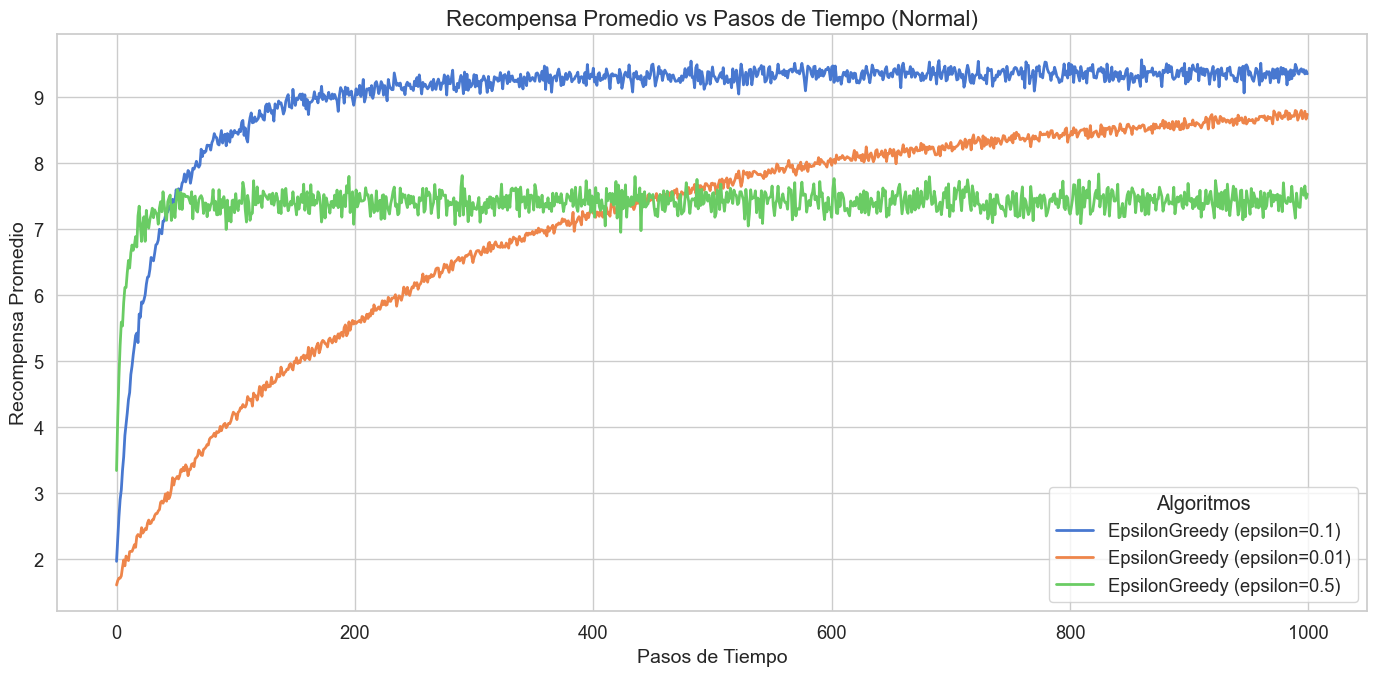

In [3]:
plot_average_rewards(steps, rewardsNormal, algorithms, "Normal")

##### Análisis detallado de la imagen

La imagen muestra un gráfico de líneas titulado **"Recompensa Promedio vs Pasos de Tiempo"**, donde se analiza el desempeño de diferentes estrategias del algoritmo **ε-Greedy** en un entorno de multi-armed bandit. En el eje **x** se representan los **pasos de tiempo**, mientras que en el eje **y** se muestra la **recompensa promedio** obtenida por cada algoritmo.


1. **Tres líneas de colores distintos representan diferentes valores de ε en el algoritmo ε-Greedy:**
   - **Azul (ε = 0):** Representa una estrategia completamente **explotadora**, es decir, que siempre elige la acción que ha dado la mejor recompensa hasta ahora sin explorar nuevas opciones.
   - **Naranja (ε = 0.01):** Representa una estrategia con una pequeña probabilidad del 1% de elegir una acción aleatoria (exploración).
   - **Verde (ε = 0.1):** Representa una estrategia con un 10% de probabilidad de explorar acciones aleatorias.

2. **Crecimiento de la recompensa promedio:**
   - La línea **verde (ε=0.1)** alcanza rápidamente una recompensa promedio alta, lo que indica que la estrategia con mayor exploración aprende más rápido qué brazos del bandit son óptimos.
   - La línea **naranja (ε=0.01)** también muestra un crecimiento, pero más lento en comparación con ε=0.1.
   - La línea **azul (ε=0)** se mantiene en un nivel bajo de recompensa, lo que sugiere que no logra encontrar el mejor brazo porque no explora nuevas opciones.

---





#### Selecciones Optimas


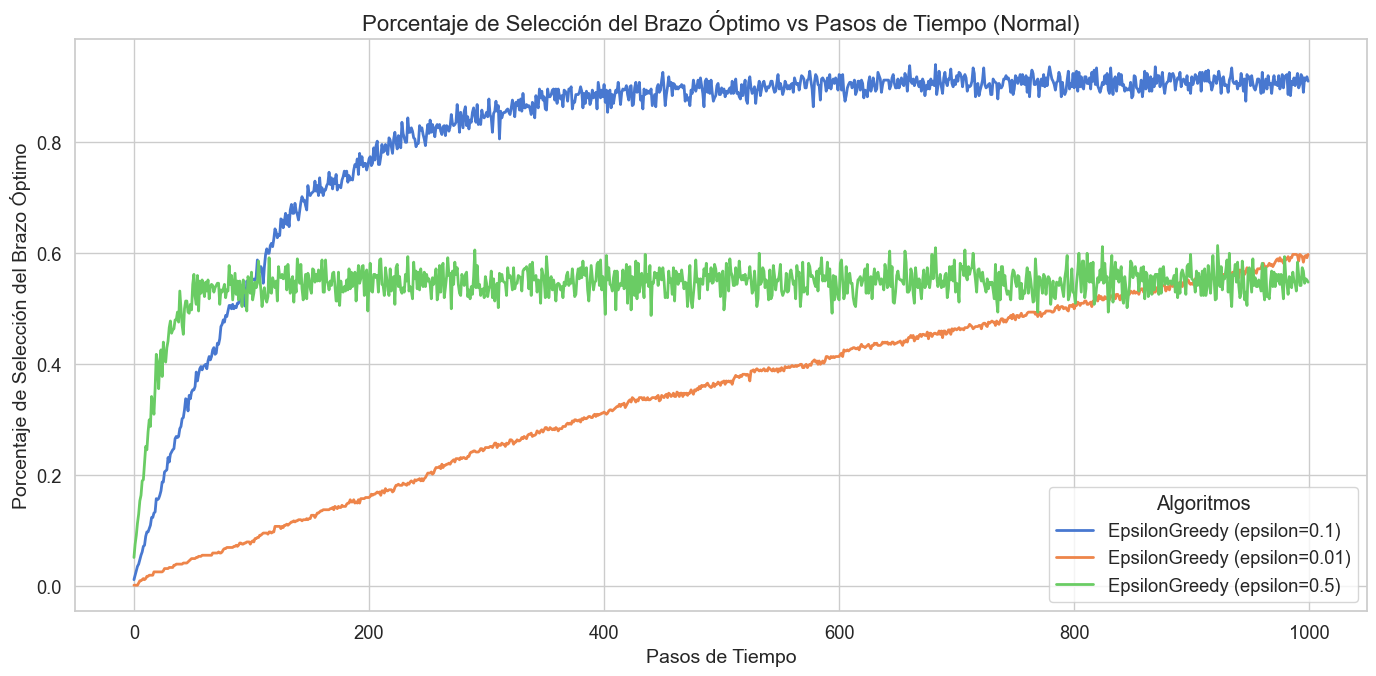

In [4]:
plot_optimal_selections(steps, optimal_selectionsNormal, algorithms, "Normal")



##### **Análisis detallado del gráfico**
**Eje Y:** Representa el **porcentaje de selección del brazo óptimo**, es decir, la frecuencia con la que cada estrategia elige la mejor opción disponible.

**Interpretacion de resultados de algoritmo ε-Greedy:**
   - **Azul (ε = 0.1):** Se observa que este valor de exploración logra alcanzar la mayor tasa de selección del brazo óptimo a largo plazo, estabilizándose en torno al 80%.
   - **Naranja (ε = 0.01):** Aunque mejora con el tiempo, su crecimiento es mucho más lento. Al final del gráfico, alcanza cerca del 60%, lo que indica que explora muy poco y tarda más en aprender cuál es la mejor opción.
   - **Verde (ε = 0.5):** En los primeros pasos, alcanza un porcentaje de selección alto rápidamente, pero luego se mantiene alrededor del 50-60% sin mejorar demasiado. Esto sugiere que explora demasiado y no explota lo suficiente el mejor brazo.


#### Estadisticas de los Brazos



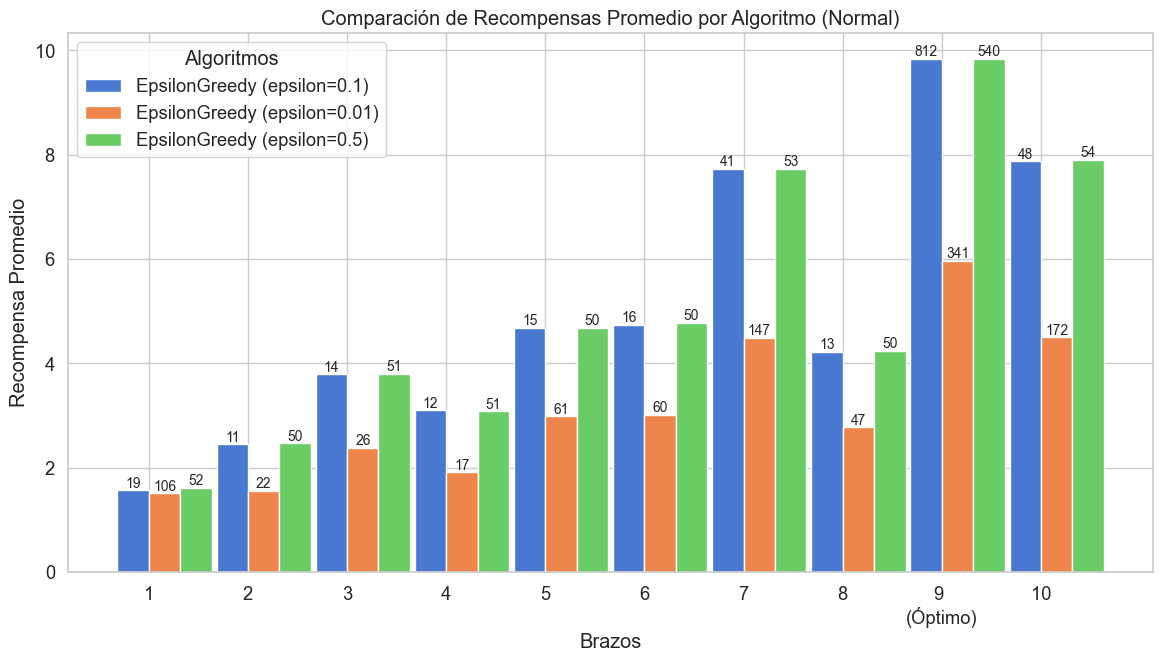

In [5]:
plot_arm_statistics(stats_arms_algorithmsNormal, algorithms, "Normal")


##### Analisis detallado del gráfico:

**Elementos del gráfico:**
1. **Eje Y (Recompensa Promedio):** Muestra la recompensa media obtenida al seleccionar cada brazo.
2. **Números sobre las barras:** Representan la **cantidad de veces** que cada algoritmo seleccionó ese brazo.

**Interpretacion de resultados de algoritmo ε-Greedy:**
1. **Brazo óptimo (9):** 
   - Se selecciona con más frecuencia por **ε=0.1 y ε=0.5**, lo que demuestra que estos valores de exploración permiten descubrir la mejor opción más rápidamente.
   - **ε=0.01 selecciona el brazo óptimo con menor frecuencia**, lo que indica que su baja tasa de exploración le dificulta encontrar la mejor opción.

2. **Brazos subóptimos:** 
   - **ε=0.5 selecciona muchos brazos con mayor frecuencia**, lo que sugiere que su alta exploración lo hace repartir las selecciones en múltiples opciones, disminuyendo su enfoque en el mejor brazo.
   - **ε=0.1 se concentra más en los brazos con mayores recompensas**, indicando un buen balance entre exploración y explotación.
   - **ε=0.01 explora poco**, lo que provoca que dependa en gran medida de las primeras decisiones, lo que puede llevarlo a seleccionar opciones subóptimas más a menudo.


#### Rechazo acumulado

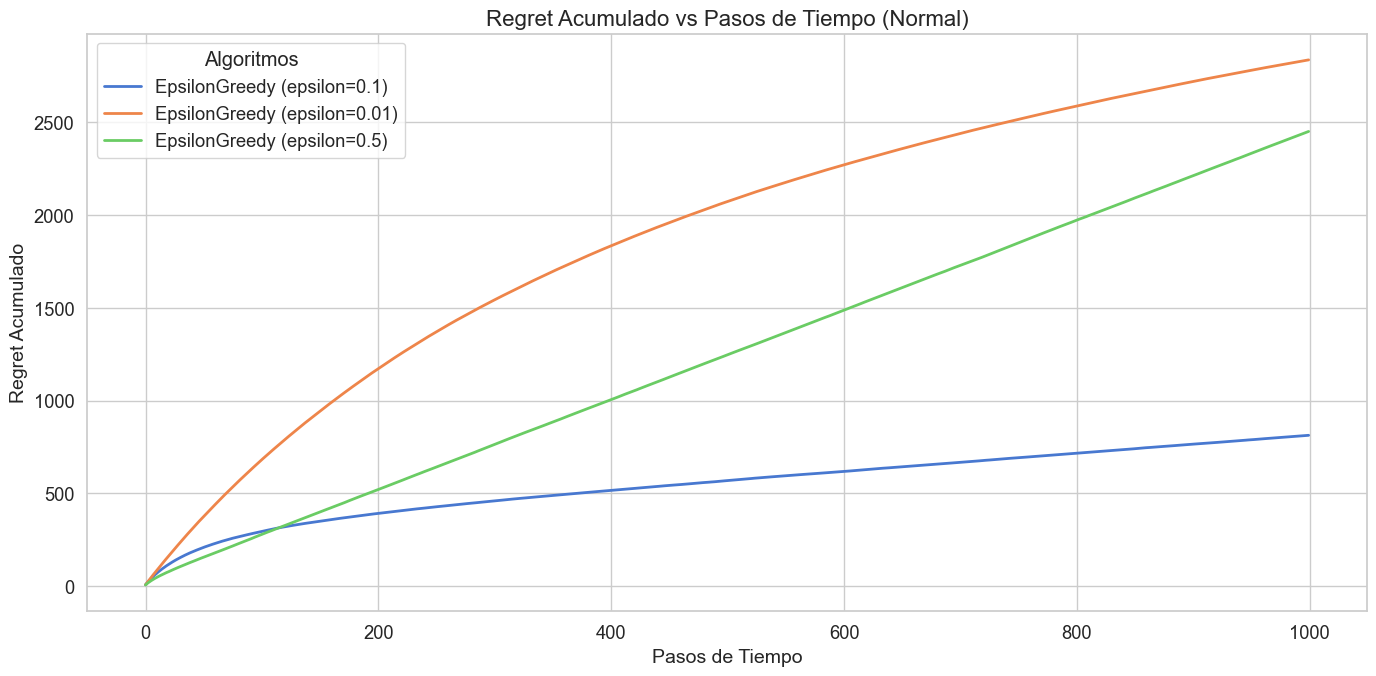

In [6]:
plot_regret(steps, regretNormal, algorithms, "Normal")

##### Analisis detallado del gráfico:

**Eje Y (Rechazo Acumulado):** Muestra la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.



**Interpretacion de resultados de algoritmo ε-Greedy:**
1. **Rechazo más bajo (mejor desempeño):**
   - **ε=0.1 (azul) tiene el menor rechazo acumulado.** Esto indica que logra aprender el brazo óptimo rápidamente y lo selecciona con frecuencia, minimizando la pérdida de recompensa a lo largo del tiempo. Ya que explora lo suficiente como para encontrar rapidamente el optimo y luego lo explota lo suficiente.
   
2. **Rechazo más alto (peor desempeño):**
   - **ε=0.01 (naranja) tiene el peor desempeño.** Su curva de rechazo acumulado crece rápidamente porque no explora lo suficiente al inicio y tarda demasiado en descubrir la mejor opción.
   - **ε=0.5 (verde) también tiene un rechazo alto,** ya que explora demasiado y no se enfoca en explotar la mejor opción cuando ya la ha encontrado.

3. **Tendencias a largo plazo:**
   - La curva **azul (ε=0.1) crece lentamente**, lo que confirma que ha encontrado el mejor brazo y lo sigue explotando.
   - La curva **naranja (ε=0.01) sigue creciendo constantemente**, lo que indica que no explora lo suficiente y no aprende el óptimo de manera eficiente.
   - La curva **verde (ε=0.5) crece más rápido que la azul pero más lento que la naranja**, lo que sugiere que explora demasiado y no optimiza bien su estrategia.



### ¿Que graficas han sido mas relevantes?
De las cuatro gráficas analizadas, las más importantes para evaluar el rendimiento del algoritmo **ε-Greedy** en el problema del **Bandido de K-Brazos** son:

#### **Regret Acumulado vs Pasos de Tiempo**
Esta es la métrica más crítica para evaluar la eficiencia de un algoritmo en problemas de toma de decisiones secuenciales. El **rechazo acumulado** nos permite medir cuánta recompensa se ha perdido en comparación con una estrategia óptima.  Esto lo hace fundamental ya que con ver la curva del rechazo acumulado se puede ver que metodos tardan en encontrar el optimo y por lo tanto pierden muchos recursos por el camino y cuales lo encuentran de forma eficaz. Además es facil de interpretar

#### **Porcentaje de Selección del Brazo Óptimo vs Pasos de Tiempo**
Esta métrica indica con qué frecuencia el algoritmo elige el mejor brazo a lo largo del tiempo, lo cual es clave para entender su comportamiento exploratorio y su capacidad de converger hacia la mejor decisión. En este sentido creemos que esta gráfica complementa la del rechazo acumulado, mostrando de manera clara cómo cada variante del algoritmo aprende a identificar y seleccionar la mejor opción.

#### **¿Por qué no son tan relevantes las otras dos gráficas?**
- **Recompensa Promedio vs Pasos de Tiempo:** Aunque útil, esta métrica puede ser menos clara para evaluar el rendimiento del algoritmo en términos de pérdida de oportunidades (rechazo) ya que impide percibir la perdida de recursos que se puede dar ademas, se puede obtener facilmente en gran medida del gráfico de **rechazo acumulado**.
- **Comparación de Recompensas Promedio por Algoritmo:** Aunque muestra cómo cada algoritmo distribuye sus elecciones entre los diferentes brazos, no permite diagnosticar la eficiencia del algoritmo segun avanzan los pasos, un algoritmo podria ir a peor y las graficas no lo notarian.

Dadoque las mas importantes son las dos primeras indicadas vamos a pasar a analizar para el resto de algoritmos unicamente estas 2 graficas.

### Bandido con distribucion Binomial

#### Selecciones Optimas


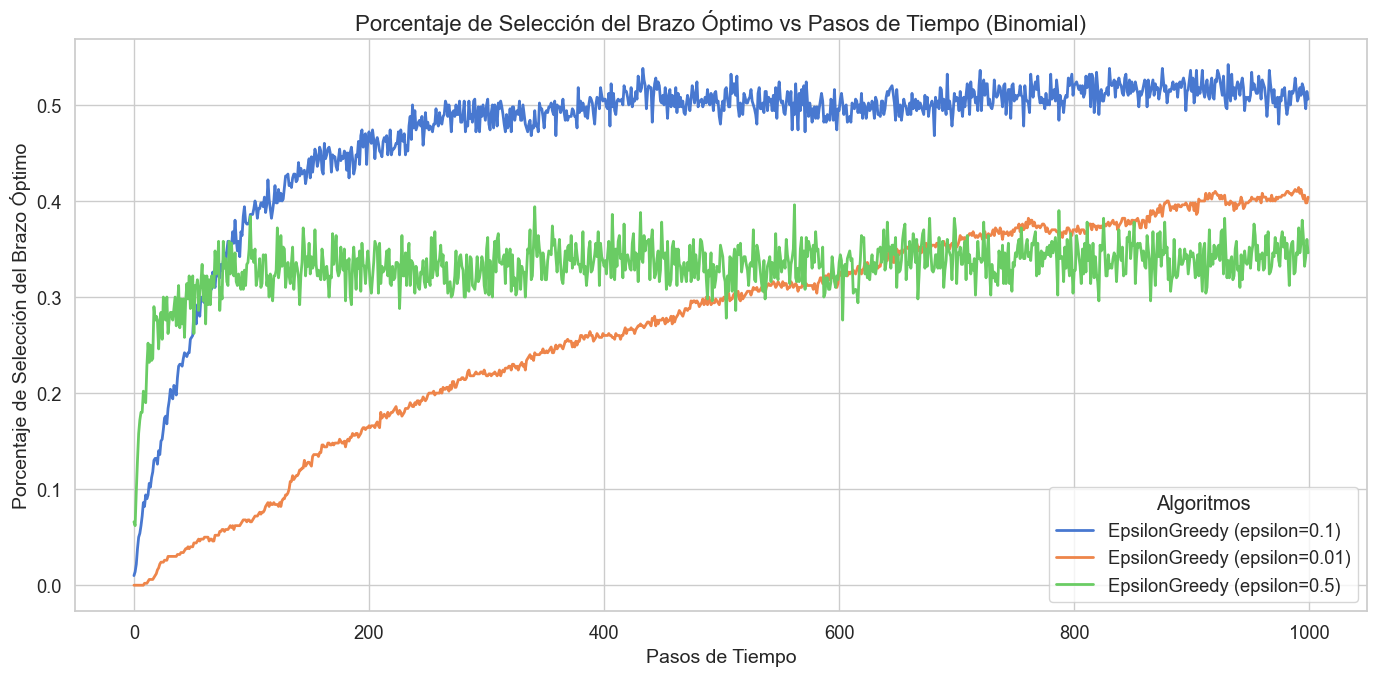

In [7]:

plot_optimal_selections(steps, optimal_selectionsBinomial, algorithms, "Binomial")


##### Analisis detallado del gráfico:

**Eje Y:** Representa el **porcentaje de selección del brazo óptimo**, es decir, la frecuencia con la que cada estrategia elige la mejor opción disponible.

**Interpretacion de resultados de algoritmo ε-Greedy:**
- **El algoritmo con ε=0.1 logra el mejor equilibrio entre exploración y explotación.** Se estabiliza en una alta tasa de selección del brazo óptimo, lo que confirma su eficiencia en la identificación de la mejor opción.
- **El algoritmo con ε=0.01 tiene una mejora lenta,** lo que indica que explora demasiado poco y tarda mucho en aprender cuál es el brazo óptimo.
- **El algoritmo con ε=0.5 mantiene un porcentaje estable pero moderado,** ya que sigue explorando incluso cuando ha encontrado el mejor brazo, lo que impide que lo explote al máximo.



#### Rechazo acumulado

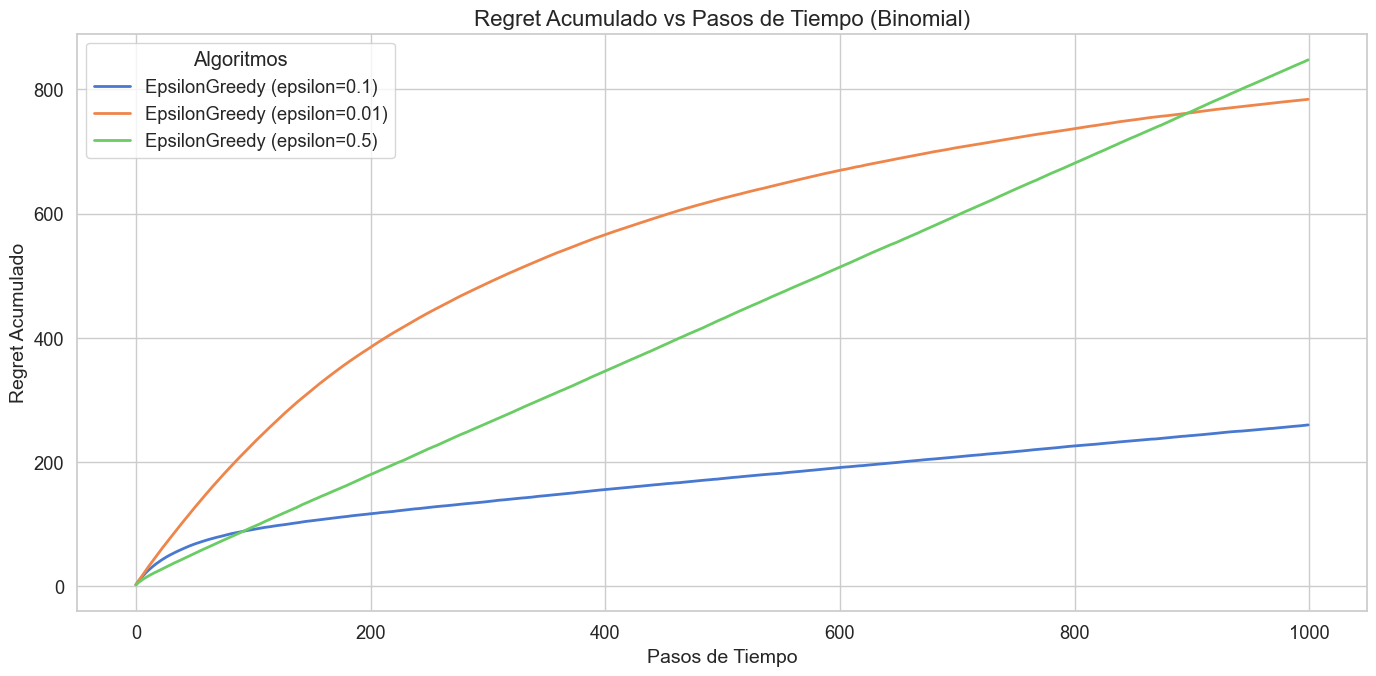

In [8]:
plot_regret(steps, regretBinomial, algorithms, "Binomial")

##### Analisis detallado del gráfico:

**Eje Y (Rechazo Acumulado):** Muestra la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.

**Interpretacion de resultados de algoritmo ε-Greedy:**
- **El algoritmo con ε=0.1 minimiza el rechazo de manera eficiente,** lo que confirma que es el mejor balance entre exploración y explotación.
- **El algoritmo con ε=0.01 acumula demasiado rechazo,** lo que indica que explora tan poco que tarda mucho en encontrar la mejor opción. Seguramente si tuviesemos mas pasos podriamos ver como se acercaria a estabilizar aun mas la curva generada.
- **El algoritmo con ε=0.5 también acumula un rechazo considerable,** lo que sugiere que explora demasiado y no se enfoca en explotar la mejor opción cuando ya la ha identificado. Cabe destacar que al principio en los primeros pasos es el que obtiene mejor rechazo acumulado, pero al no explotar el optimo de forma consistente y explorar demasiado este es adelantado rapidamente por otros algoritmos que si que explotan mas los optimos.

### Bandido con distribucion Bernoulli

#### Selecciones Optimas


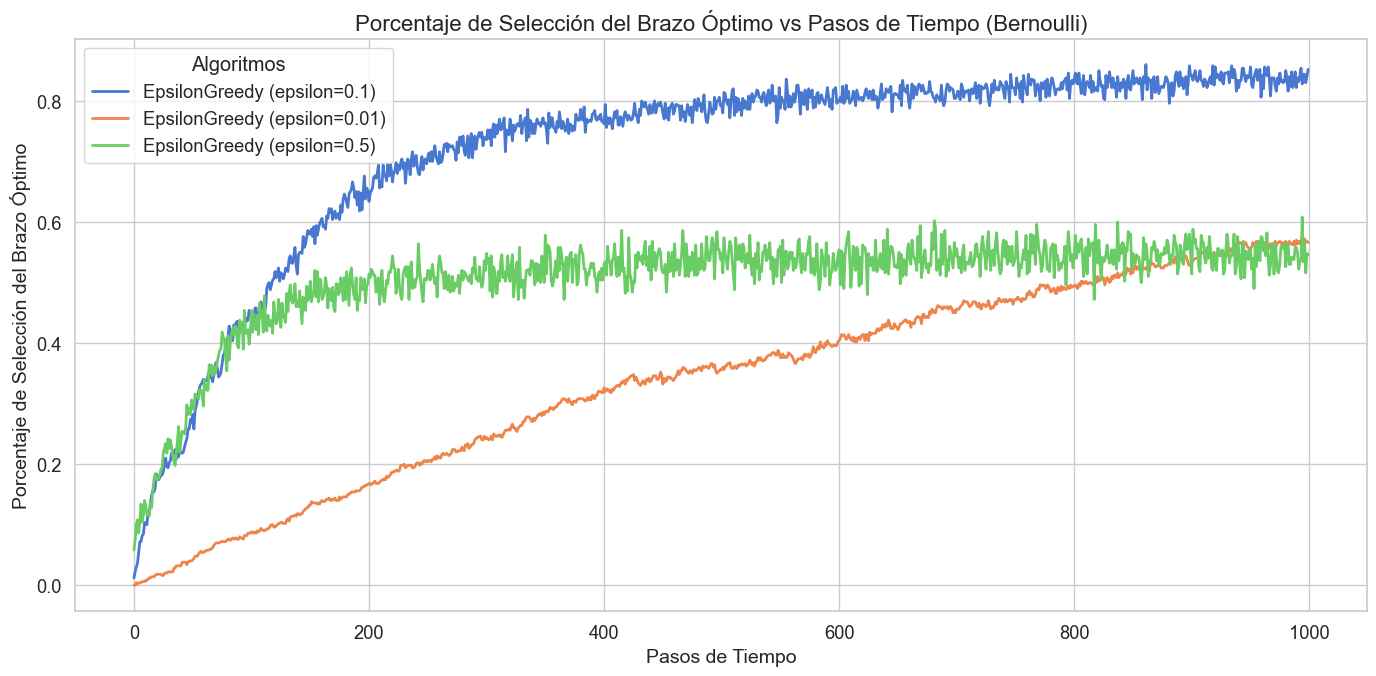

In [9]:
# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas

plot_optimal_selections(steps, optimal_selectionsBernoulli, algorithms, "Bernoulli")


##### Analisis detallado del gráfico:

**Eje Y:** Representa el **porcentaje de selección del brazo óptimo**, es decir, la frecuencia con la que cada estrategia elige la mejor opción disponible.

**Interpretacion de resultados de algoritmo ε-Greedy:**
- **El algoritmo con ε=0.1 es el mejor balanceado:** Tiene la tasa de selección del brazo óptimo más alta, lo que sugiere que encuentra la mejor opción rápidamente y la explota bien.
- **ε=0.01 aprende lentamente:** La falta de exploración le impide aprender rápidamente cuál es la mejor opción. Aunque mejora con respecto a otro tipo de distribuciones
- **ε=0.5 explora demasiado:** Su porcentaje de selección del brazo óptimo es más alto que **ε=0.01**, pero su constante exploración lo mantiene en una tasa relativamente baja.


#### Rechazo acumulado

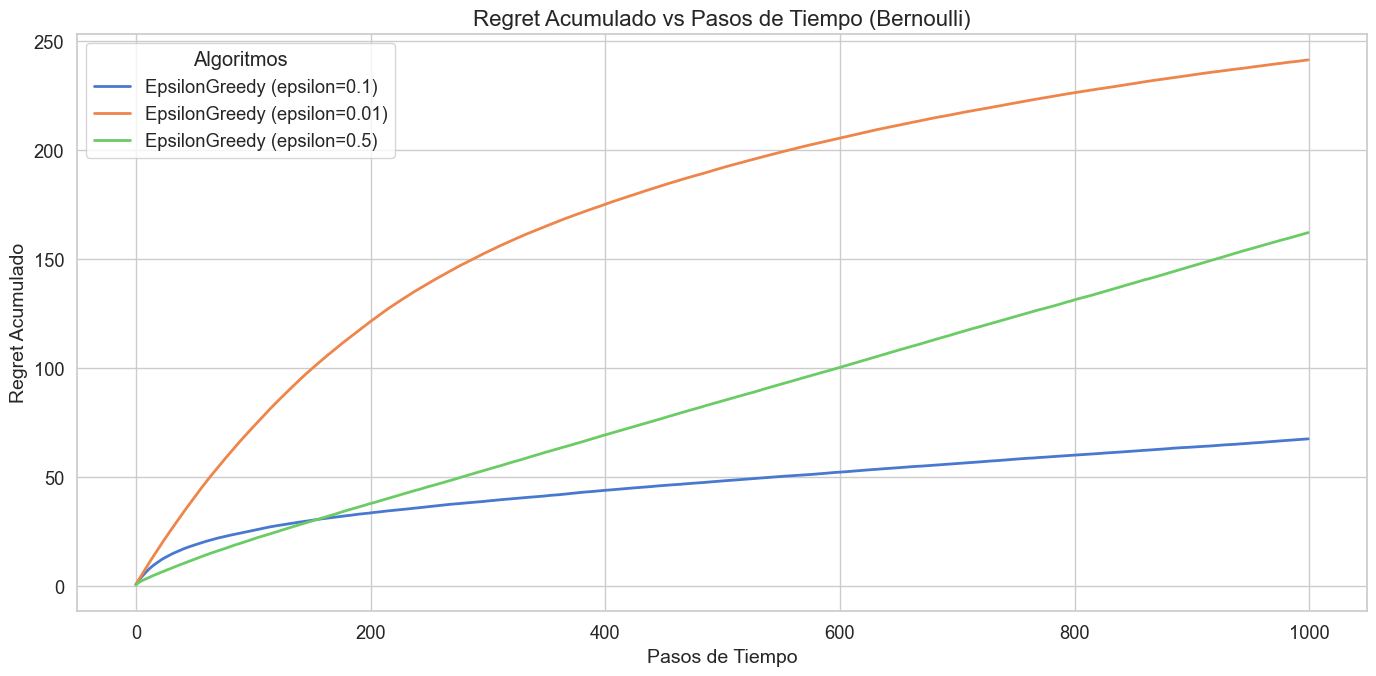

In [10]:
plot_regret(steps, regretBernoulli, algorithms, "Bernoulli")

##### Analisis detallado del gráfico:

**Eje Y (Rechazo Acumulado):** Muestra la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.

**Interpretacion de resultados de algoritmo ε-Greedy:**
- **El algoritmo con ε=0.1 minimiza el rechazo de manera eficiente**, lo que confirma que encuentra un buen balance entre exploración y explotación.
- **ε=0.01 acumula demasiado rechazo en los primeros steps**, demostrando que una exploración insuficiente impide que aprenda rápidamente la mejor opción.
- **ε=0.5 tiene un rechazo intermedio pero creciente**, lo que indica que explora tanto que no logra enfocarse en el brazo óptimo de manera efectiva.

## **Conclusiones**

Hemos analizado un **experimento de toma de decisiones secuenciales** utilizando un **Bandido de K-Brazos**, un problema clasico en el aprendizaje por refuerzo y la teoría de decisiones. En este estudio, nos hemos centrado en evaluar el rendimiento del algoritmo **ε-Greedy**, explorando cómo diferentes valores de **ε** afectan la capacidad del agente para identificar y explotar la mejor acción. A partir de los resultados obtenidos y las gráficas generadas, llegamos a las siguientes conclusiones:

### **1. Exploración vs Explotación**
El algoritmo **ε-Greedy** equilibra la exploración y la explotación:
- **Explotación (ε cercano o igual a 0)**: Favorece la selección de la mejor opción conocida, pero si inicialmente se elige un brazo subóptimo, el algoritmo puede quedar atrapado sin descubrir mejores alternativas.
- **Exploración (ε>0)**: Introduce aleatoriedad en la selección de acciones, permitiendo al agente descubrir mejores opciones a largo plazo.

Los gráficos confirman este comportamiento:
- **ε=0.1 (azul)** logra minimizar el rechazo acumulado y alcanzar un alto porcentaje de selección del brazo óptimo, mostrando el mejor balance entre exploración y explotación.
- **ε=0.01 (naranja)** explora muy poco, lo que ralentiza su convergencia hacia el brazo óptimo y genera un rechazo acumulado mucho mayor.
- **ε=0.5 (verde)** explora en exceso, evitando que el agente se enfoque rápidamente en el mejor brazo, lo que aumenta su rechazo y reduce la recompensa promedio.

### **2. Convergencia y desempeño de los algoritmos**
Los experimentos muestran que:
- Algoritmos con **moderada exploración (ε=0.1)** identifican más rápido el brazo óptimo y mantienen una alta recompensa promedio.
- **Demasiada exploración (ε=0.5)** impide la convergencia eficiente, ya que el agente sigue explorando incluso cuando ha encontrado el mejor brazo.
- **Exploración insuficiente (ε=0.01)** hace que el agente tarde demasiado en descubrir la mejor opción, perjudicando su desempeño general.

### **3. Aplicaciones y Relevancia**
- En aplicaciones prácticas como **recomendaciones de contenido, publicidad optimizada y estrategias de inversión**, un valor **moderado de exploración (ε=0.1)** es ideal para aprender rápidamente cuál es la mejor opción.
- **La falta de exploración (ε=0.01)** puede hacer que el sistema tome malas decisiones al basarse en información limitada.
- **La exploración excesiva (ε=0.5)** desperdicia recursos en decisiones subóptimas, reduciendo la eficiencia del sistema.
### **4. Diferencias entre distribuciones de los brazos**
- En ε-greedy, el tipo de distribucion del brazo altera ligeramente los resultados obtenidos en las graficas relevantes, por lo que realmente en este sentido, los parametros mas moderados que permiten un equilibrio entre explotacion-exploracion siguen siendo los mejores (ε=0.1)


En conclusión, **el balance entre exploración y explotación es crucial en problemas de toma de decisiones secuenciales. El valor ε=0.1 se presenta como la mejor opción en términos de aprendizaje rápido y maximización de recompensas a largo plazo**. 